![picture](https://drive.google.com/uc?export=view&id=1eCsjNAtjXuXfqBLxeEnsBpOikUO06msr)

<br>

---
---

<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Foundations of Artificial Intelligence<br> (AI701-Fall2022) </span><h1>

<h2><span style="color:green"> Lab-10 </span><h2>
</div>

---
---

# Neural Networks using PyTorch modules 

In the last lab we had introduction to PyTorch and built a simple neural network from scratch. Today we will explore the pytorch modules torch.nn and torch.optim to build and optimize the neural network.

Training a model is an iterative process; in each iteration (called an *epoch*) the model makes a guess about the output, calculates
the error in its guess (*loss*), collects the derivatives of the error with respect to its parameters (as we saw in
the previous lab), and **optimizes** these parameters using gradient descent. For a more
detailed walkthrough of this process, check out this video on [backpropagation from 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8)_.

## Building a neural network using torch.nn module
We will be using FashionMNIST dataset for experimentation. Click [here](https://pytorch.org/vision/stable/datasets.html) to explore more datasets available in PyTorch. Also see the [documentation](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) of Dataloaders in Pytorch. 


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
torch.manual_seed(42)
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
vars(test_dataloader)

{'dataset': Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 'num_workers': 0,
 'prefetch_factor': 2,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 64,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.SequentialSampler at 0x7f0591d17490>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7f0591678410>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [13]:
len(train_dataloader.dataset)

60000

In [12]:
len(test_dataloader.dataset)

10000

In [18]:
next(iter(test_dataloader.dataset))[0].shape

torch.Size([1, 28, 28])

In [19]:
next(iter(test_dataloader.dataset))[1]

9

In [9]:
len(next(iter(test_dataloader)))

2

In [7]:
next(iter(test_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

In [8]:
next(iter(test_dataloader))[1].shape

torch.Size([64])

In [11]:
len(test_dataloader)

157

In [20]:
next(iter(test_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [14]:
len(train_dataloader)

938

In [15]:
# next(iter(test_dataloader))[0]

In [17]:
next(iter(test_dataloader))[1]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])

In [21]:
flatten = nn.Flatten()
flatten(next(iter(test_dataloader))[0]).shape

torch.Size([64, 784])

#### nn Module
nn Module defines a set of functions, similar to the layers of a neural network, which takes the input from the previous state and produces an output.

In [12]:
28*28

784

In [22]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x) # Makes into 1 dimensional array
        logits = self.linear_relu_stack(x)
        return logits

torch.manual_seed(42)
model = NeuralNetwork()

In [ ]:
#@title What is the self keyword doing?
"""Answer: The self in keyword in Python is used for all the instances in a class. By using the self keyword, one can easily access all the instances defined within a class, including its methods and attributes. __init__ is one of the reserved methods in Python. In object oriented programming, it is known as a constructor."""

'Answer: The self in keyword in Python is used for all the instances in a class. By using the self keyword, one can easily access all the instances defined within a class, including its methods and attributes. __init__ is one of the reserved methods in Python. In object oriented programming, it is known as a constructor.'

In [ ]:
#@title What is super keyword doing?
"""The super() function is used to give access to methods and properties of a parent or sibling class. The super() function returns an object that represents the parent class. """


'The super() function is used to give access to methods and properties of a parent or sibling class. The super() function returns an object that represents the parent class. '

## Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process.
Different hyperparameter values can impact model training and convergence rates
([read more](https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html) about hyperparameter tuning)

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples propagated through the network before the parameters are updated
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.




In [23]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimization Loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each
iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop.

### Loss Function

When presented with some training data, our untrained network is likely not to give the correct
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value,
and it is the loss function that we want to minimize during training. To calculate the loss we make a
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Square Error) for regression tasks, and
[nn.NLLLoss](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) for classification.
[nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) combines ``nn.LogSoftmax`` and ``nn.NLLLoss``.

We pass our model's output logits to ``nn.CrossEntropyLoss``, which will normalize the logits and compute the prediction error.



In [24]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many [different optimizers](https://pytorch.org/docs/stable/optim.html)
available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

### SGD
Stochastic gradient descent is extremely basic and is seldom used now. Stochastic gradient descent generally has a hard time escaping the saddle points. Adagrad, Adadelta, RMSprop, and ADAM generally handle saddle points better. SGD with momentum renders some speed to the optimization and also helps escape local minima better. [Learn more here](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD)



In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:
 * Call ``optimizer.zero_grad()`` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Backpropagate the prediction loss with a call to ``loss.backward()``. PyTorch deposits the gradients of the loss w.r.t. each parameter.
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.



In [26]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [27]:
loss_fn

CrossEntropyLoss()

In [28]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Full Implementation
We define ``train_loop`` that loops over our optimization code, and ``test_loop`` that
evaluates the model's performance against our test data.



In [31]:
for batch, (X, y) in enumerate(train_dataloader):
  print(batch)
  print()
  print(X.shape)
  print()
  print(y)
  break

0

torch.Size([64, 1, 28, 28])

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])


In [34]:
for batch, (X, y) in enumerate(train_dataloader):
  pred = model(X)
  print(y.shape)
  print(pred.shape)
  loss = loss_fn(pred, y)
  print(loss)
  print(loss.item())
  break

torch.Size([64])
torch.Size([64, 10])
tensor(2.2987, grad_fn=<NllLossBackward0>)
2.29872989654541


Model outputs logits so here we get a shape of torch.Size([64, 10]) which is log q(x) for the cross entropy function below




logit(p)= log (p/(1-p))

p	=	probability


p/(1-p)	=	corresponding odds


![picture](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/03/Multinomial-Logistic-Classifier-compressor.jpg?resize=690%2C394)

## Cross Entropy Formula
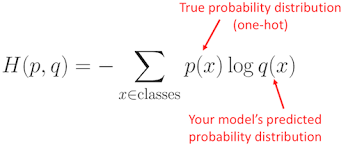

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to ``train_loop`` and ``test_loop``.
Feel free to increase the number of epochs to track the model's improving performance.



In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298730  [    0/60000]
loss: 2.289123  [ 6400/60000]
loss: 2.273286  [12800/60000]
loss: 2.269406  [19200/60000]
loss: 2.249603  [25600/60000]
loss: 2.229407  [32000/60000]
loss: 2.227369  [38400/60000]
loss: 2.204261  [44800/60000]
loss: 2.206193  [51200/60000]
loss: 2.166651  [57600/60000]
Test Error: 
 Accuracy: 50.9%, Avg loss: 2.166725 

Epoch 2
-------------------------------
loss: 2.176750  [    0/60000]
loss: 2.169596  [ 6400/60000]
loss: 2.117501  [12800/60000]
loss: 2.129274  [19200/60000]
loss: 2.079675  [25600/60000]
loss: 2.032929  [32000/60000]
loss: 2.050116  [38400/60000]
loss: 1.985238  [44800/60000]
loss: 1.987889  [51200/60000]
loss: 1.907164  [57600/60000]
Test Error: 
 Accuracy: 55.9%, Avg loss: 1.915488 

Epoch 3
-------------------------------
loss: 1.951616  [    0/60000]
loss: 1.928687  [ 6400/60000]
loss: 1.815713  [12800/60000]
loss: 1.841555  [19200/60000]
loss: 1.732471  [25600/60000]
loss: 1.692914  [32000/600

# Now it's your turn
Instructions for the tasks to be shared in lab session.


## Further Reading
- [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
- [torch.optim](https://pytorch.org/docs/stable/optim.html)
- [Warmstart Training a Model](https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html)




### Congratulations you have successfully completed Lab 10.

---

